---
title: "The can problem"
author: "Yair Mau"
date: "2021-10-27"
categories: [question]
image: "can.png"
title-block-banner: false
execute:
  freeze: auto  # re-render only when source changes
---

![](can.png)

:::{.alert .alert-primary}
### question
How does the center of mass of a can of soda vary with the level of the liquid?
:::

The center of mass of the aluminum can does not change, and assuming that the can is perfectly symmetric, its height should be half of the total can height. Calling the total height $L$, we have that $r_\text{can} = L/2$.

As the soda level in the can goes down, two things happen at the same time:

1. The center of mass of the liquid goes linearly from $L/2$ to 0.
2. The mass of the liquid goes linearly to zero as well.

At the very beginning both centers of mass are at $L/2$, and so is the center of mass of the whole thing.
At the end, the liquid is depleted and does not contribute anything to the center of mass, so again the whole system has its center of mass at $L/2$. Can we figure out what equation gives us the total center of mass as a function of the liquid level?

The center of mass of the system is given by
$$
r_{cm}(h) = \frac{r_\text{can}\cdot m_\text{can} + r_\text{liq}\cdot m_\text{liq}}{m_\text{can} + m_\text{liq}},
$$ {#eq-center-of-mass1}
where

* $m_\text{can}$ is the mass of the aluminum can,
* $r_\text{can} = L/2$ is the center of mass of the aluminum can,
* $r_\text{liq} = h/2$ is the center of mass of the soda,
* $m_\text{liq} = \rho \cdot \pi R^2 \cdot h$ is the mass of the can,
* $h$ is the soda level above the table,
* $R$ is the radius of the can,
* $\rho$ is the density of the soda.

Substituting these quantities into @eq-center-of-mass1 gives

$$
r_{cm}(h) = \frac{C \frac{L}{2} + \frac{h^2}{2}}{C+h},
$$ {#eq-center-of-mass-simple}
where the constant $C$ is
$$
C = \frac{m_\text{can}}{\rho \cdot \pi R^2}.
$$

I googled the typical values for a soda can, and got the following:

* $L = 122$ mm
* $R = 3.31$ mm
* $m_\text{can} = 14$ g
* $\rho = 1.026$ g/mL

So how does @eq-center-of-mass-simple look like?

![](can_graph.png)

Using the values above, we find that the lowest value for the center of mass of the whole system is when the soda has a level of only 6.6 mm!
This is when the can should be less likely to topple, because the center of mass is so low (relative the the total mass).

I'll finish with the Python code I used to produce the graph above.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
from sympy import symbols, diff, solve
from sympy.abc import x

In [3]:
L = 122.0 # mm
R = 3.31 # mm
Mcan = 14 # g
rho_soda = 1.026 # g/mL
C = Mcan / (rho_soda * np.pi * R**2)
h = np.linspace(0, L, 1001)

def RCM(H):
    return (C*L/2 + H**2/2) / (C+H)
Rcm = RCM(h)

# Convert the function to a symbolic expression
expr = RCM(x)
# Take the derivative
f_prime = diff(expr, x)
# Solve for x where the derivative equals zero
solutions = solve(f_prime, x)
# Print the solutions
print(solutions)
# choose the physically relevant solution
h_min= solutions[1]

[-7.36225033226790, 6.56937517541552]


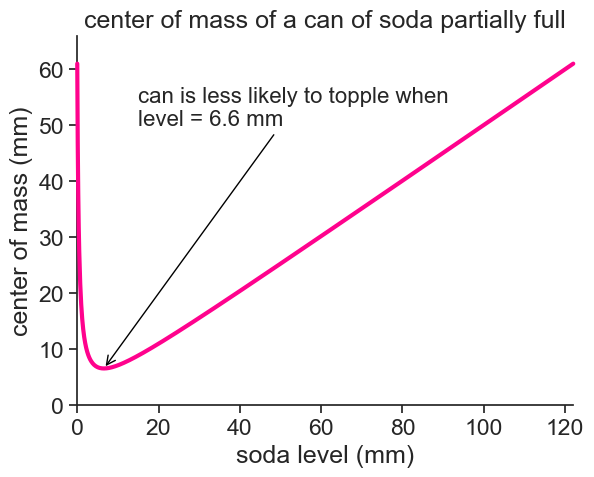

In [9]:
fig, ax = plt.subplots(1)
ax.plot(h, Rcm, lw=3, color="xkcd:hot pink", clip_on=False, zorder=100)
ax.annotate(f"can is less likely to topple when\nlevel = {h_min:.1f} mm",
            xy=(h_min, RCM(h_min)), xycoords='data',
            xytext=(15, 50), textcoords='data',
            size=16,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                            color="black"),
            )
ax.set(
    xlabel="soda level (mm)",
    ylabel="center of mass (mm)",
    ylim=[0,L/2+5],
    xlim=[0, h[-1]],
    title="center of mass of a can of soda partially full")

# hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.savefig("can_graph.png", bbox_inches='tight', dpi=300)